[Refernce](https://www.youtube.com/watch?v=eMOA1pPVUc4&t=0s)

### Import necessary libraries

In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Task_1:- Merging 12 months of sales data into single csv file

In [36]:
## Read all files from the dir
import os  #The os.listdir() method in Python is used to get the list of all files and directories in the specified directory. 

files = [file for file in os.listdir(r"C:\Users\HP\Documents\PW Skills\Project\Sales Analysis\Resource\SalesAnalysis\Sales_Data")]

for file in files:
    print(file)

desktop.ini
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [37]:
import os

# Read all files from the directory, excluding 'desktop.ini'
files = [file for file in os.listdir(r"C:\Users\HP\Documents\PW Skills\Project\Sales Analysis\Resource\SalesAnalysis\Sales_Data") if file != 'desktop.ini']
for file in files:
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


Alternate

In [38]:
# Load each CSV file from the directory
directory = r"C:\Users\HP\Documents\PW Skills\Project\Sales Analysis\Resource\SalesAnalysis\Sales_Data"
files = [file for file in os.listdir(directory) if file.endswith('.csv')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [39]:
# import pandas as pd
# files = [file for file in os.listdir(r"C:\Users\HP\Documents\PW Skills\Project\Sales Analysis\Resource\SalesAnalysis\Sales_Data") if file != 'desktop.ini']

# all_months_data = pd.DataFrame()
# for file in files:
#     df = pd.read_csv(r"C:\Users\HP\Documents\PW Skills\Project\Sales Analysis\Resource\SalesAnalysis\Sales_Data\\" + file) ## Use double back slashes to escape the back slash
#     all_months_data = pd.concat([all_months_data, df])

# all_months_data.to_csv(r"C:\Users\HP\Documents\PW Skills\Project\Sales Analysis\Resource\SalesAnalysis\all_data.csv", index=False)

### Read in updated dataframe

In [40]:
df = pd.read_csv(r"C:\Users\HP\Documents\PW Skills\Project\Sales Analysis\Resource\SalesAnalysis\all_data.csv")

In [41]:
df.shape

(186850, 6)

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning and manupulation

### Columns

In [43]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [44]:
df.columns = df.columns.str.lower()

In [45]:
df.columns = df.columns.str.replace( ' ', '_')

### null Values

In [46]:
df.isnull().sum()

order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

### Drop the rows with null values

In [47]:
df.dropna(inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


change the data type to int of column price and quantity 

In [49]:
# df['quantity_ordered'] = df['quantity_ordered'].astype(int)
# df['price_each'] = df['price_each'].astype(float)
df['quantity_ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

### Find the the row with Quantity Ordered and delete it

In [50]:
df = df[df['quantity_ordered']!='Quantity Ordered']

In [51]:
df['quantity_ordered'] = df['quantity_ordered'].astype(int) # make it integer 
df['price_each'] = df['price_each'].astype(float) # make float

## Augment data with month column

### Task_2:- Add month column

In [52]:
df['order_date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: order_date, Length: 185950, dtype: object

In [53]:
df['month'] = df['order_date'].str[0:2]
# df['month']

### Convert th month column to int 

In [54]:
# df['month'] = df['month'].astype('int32')
# df.head(3)

In [55]:
# Display unique values in the 'month' column
print(df['month'].unique())


['04' '05' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


### Find 'or and delete it 

In [56]:
df = df[df['month'] != 'Or'] ## Filter out the data with no "or" in month column
print(df['month'].unique())

['04' '05' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [57]:
df['month'] = df['month'].astype('int32')
df.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


### Q1 What was the best month for sales? How much was earned that month

### Make a sales column

In [58]:
df['sales'] = df['quantity_ordered']*df['price_each']

In [59]:
month_wise = df.groupby('month').sum(numeric_only=True).sort_values(by='sales',ascending=False)
month_wise.head()

,quantity_ordered,price_each,sales
month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75


In [60]:
top_sales = pd.DataFrame(month_wise).reset_index()
top_sales

,month,quantity_ordered,price_each,sales
0,12,28114,4588415.41,4613443.34
1,10,22703,3715554.83,3736726.88
2,4,20558,3367671.02,3390670.24
3,11,19798,3180600.68,3199603.20
4,5,18667,3135125.13,3152606.75
5,3,17005,2791207.83,2807100.38
6,7,16072,2632539.56,2647775.76
7,6,15253,2562025.61,2577802.26
8,8,13448,2230345.42,2244467.88
9,2,13449,2188884.72,2202022.42


<Axes: xlabel='month', ylabel='sales'>

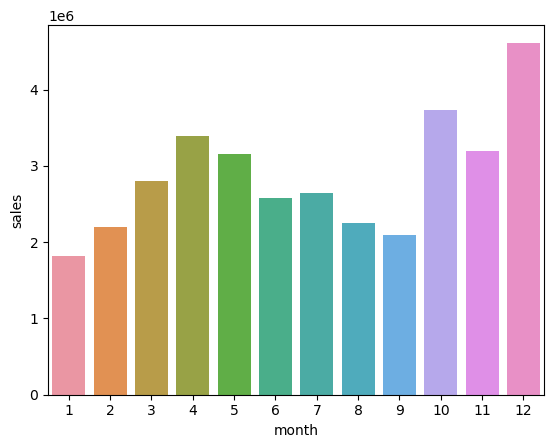

In [61]:
sns.barplot(data=top_sales,x= 'month',y='sales')

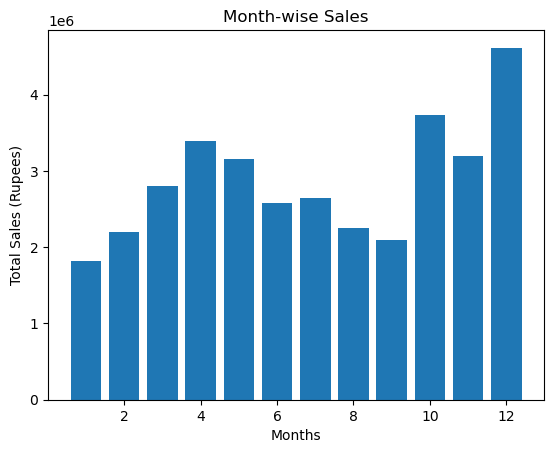

In [62]:
plt.bar(top_sales['month'],top_sales['sales'])
plt.xlabel("Months")
plt.ylabel("Total Sales (Rupees)")
plt.title("Month-wise Sales")
plt.show()

## Q2. Which city has the highest number of sale?

In [63]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'month', 'sales'],
      dtype='object')

In [64]:
df.purchase_address

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: purchase_address, Length: 185950, dtype: object

### Task_4:- Add a city column

In [65]:
# df['purchase_address'].str.split(',')

In [66]:
# df['purchase_address'].str.split(',').str[1]

In [67]:
# city_names = df['purchase_address'].str.split(',').str[1].str.strip()
df['city']= city_names

NameError: name 'city_names' is not defined

In [893]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


Alternate - By using .apply method

In [894]:
# df['city'] = df['purchase_address'].apply(lambda x: x.split(',')[1])

In [895]:
def get_city(x):
    return x.split(', ')[1]

def get_state(x):
    return x.split(', ')[2].split(' ')[0]

df['city'] = df['purchase_address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [896]:
# df.drop(columns = 'city_1') drop column

In [897]:
city_wise = df.groupby('city').sum(numeric_only=True).reset_index()

In [898]:
top_city= city_wise.sort_values(by='sales',ascending=False)
top_city.head(1)

,city,quantity_ordered,price_each,month,sales
8,San Francisco (CA),50239,8211461.74,315520,8262203.91


<Axes: xlabel='city', ylabel='sales'>

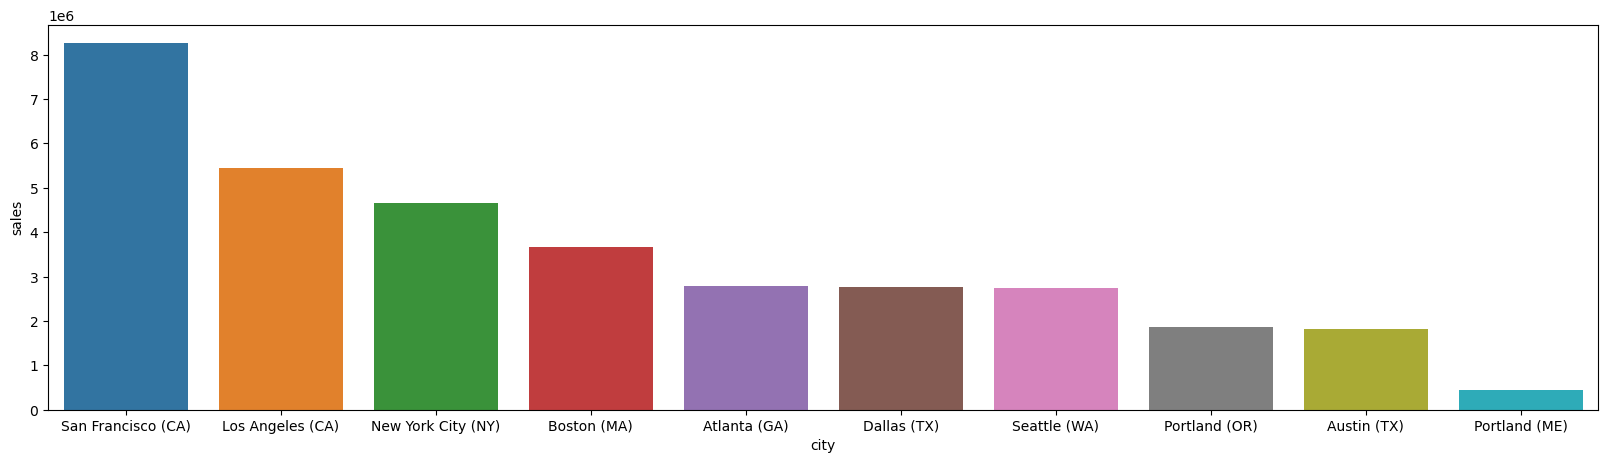

In [899]:
plt.figure(figsize=(20,5))
sns.barplot(data=top_city,x='city',y='sales')

### Q3. What time should we display advertisement to maximise likelihood of customer's buying good?

In [900]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Extract time 

In [901]:
df['time'] = df['order_date'].str.split(' ').str[1]
# df['time']=df['time'].sort_values(ascending=False)

### Chnge to date time object 

In [902]:
df['order_date'] = pd.to_datetime(df['order_date'])


C:\Users\HP\AppData\Local\Temp\ipykernel_9764\2660814267.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [903]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:27
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20:56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16:00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),07:39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17:30


extract time

In [904]:
df['time'] = df['order_date'].dt.time
df['hour'] = df['order_date'].dt.hour
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:30:00,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:38:00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:38:00,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:27:00,9


In [905]:
temp = df.groupby('hour')['sales'].sum()
best_hour = pd.DataFrame(temp).reset_index()
best_hour.head()

,hour,sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01


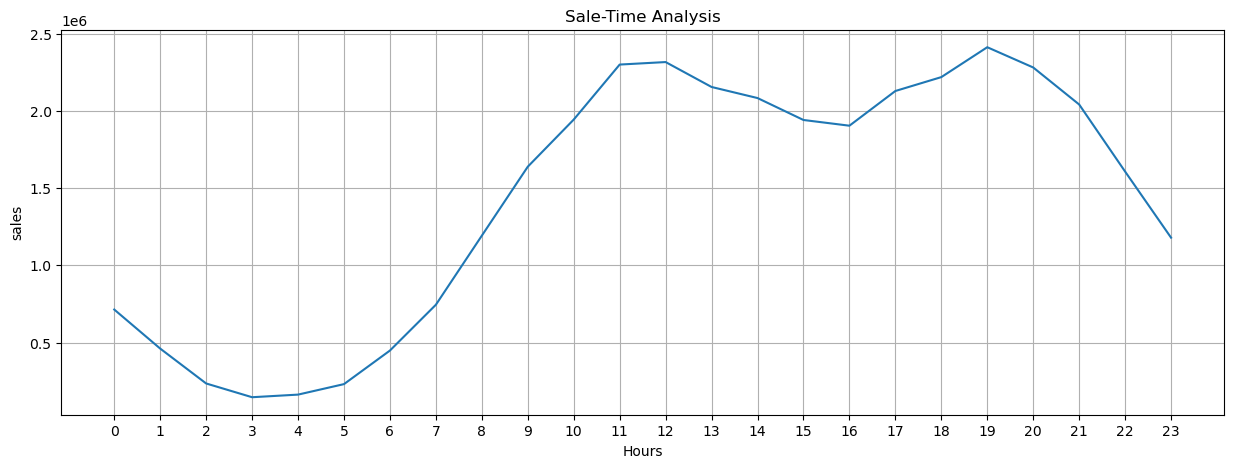

In [906]:
plt.figure(figsize=(15,5))
sns.lineplot(data=best_hour,x='hour',y='sales')

plt.xticks(best_hour['hour'].unique()) # To show all the unique values of hour value

plt.grid()
plt.xlabel('Hours')

plt.title('Sale-Time Analysis')
plt.show()

### Q4. What products are most ofter sold together?

If two order id's are same that mean they sold together

In [907]:
# df[df['order_id']=='176560']

In [908]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:30:00,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:38:00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:38:00,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:27:00,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20:56:00,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16:00:00,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),07:39:00,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17:30:00,17


In [909]:
couple_product = df[df['order_id'].duplicated(keep=False)] # keep=False show all the duplicate values with their duplicates
couple_product

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time,hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:38:00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:38:00,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19:42:00,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19:42:00,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11:31:00,11
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20:18:00,20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),00:25:00,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),00:25:00,0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13:49:00,13


In [910]:
couple_product.groupby('order_id').sum(numeric_only=True)

,quantity_ordered,price_each,month,sales,hour
order_id,,,,,
141275,2,23.94,2,23.94,32
141290,4,153.84,2,161.52,16
141365,2,411.99,2,411.99,22
141384,2,611.95,2,611.95,0
141450,2,699.99,2,699.99,22
...,...,...,...,...,...
319536,2,1711.99,24,1711.99,18
319556,2,611.99,24,611.99,16
319584,2,711.99,24,711.99,0


In [71]:
duplicate_products = df[df['order_id'].duplicated(keep=False)]

df['Grouped']= df.groupby('order_id')['product'].transform(lambda x: ','.join(x))

df[['Grouped','order_id']].drop_duplicates() #.drop_duplicates() will keep only the first occurrence and drop the others, returning a DataFrame with unique Grouped and order_id pairs.

df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Wired Headphones


### What product sold the most? why do you think it sold the most ?


In [911]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,time,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:30:00,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:38:00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:38:00,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:27:00,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20:56:00,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16:00:00,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),07:39:00,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17:30:00,17


In [912]:
temp = df.groupby('product').sum(numeric_only=True).sort_values(by='quantity_ordered',ascending=False).head(10)
top_products = pd.DataFrame(temp).reset_index()

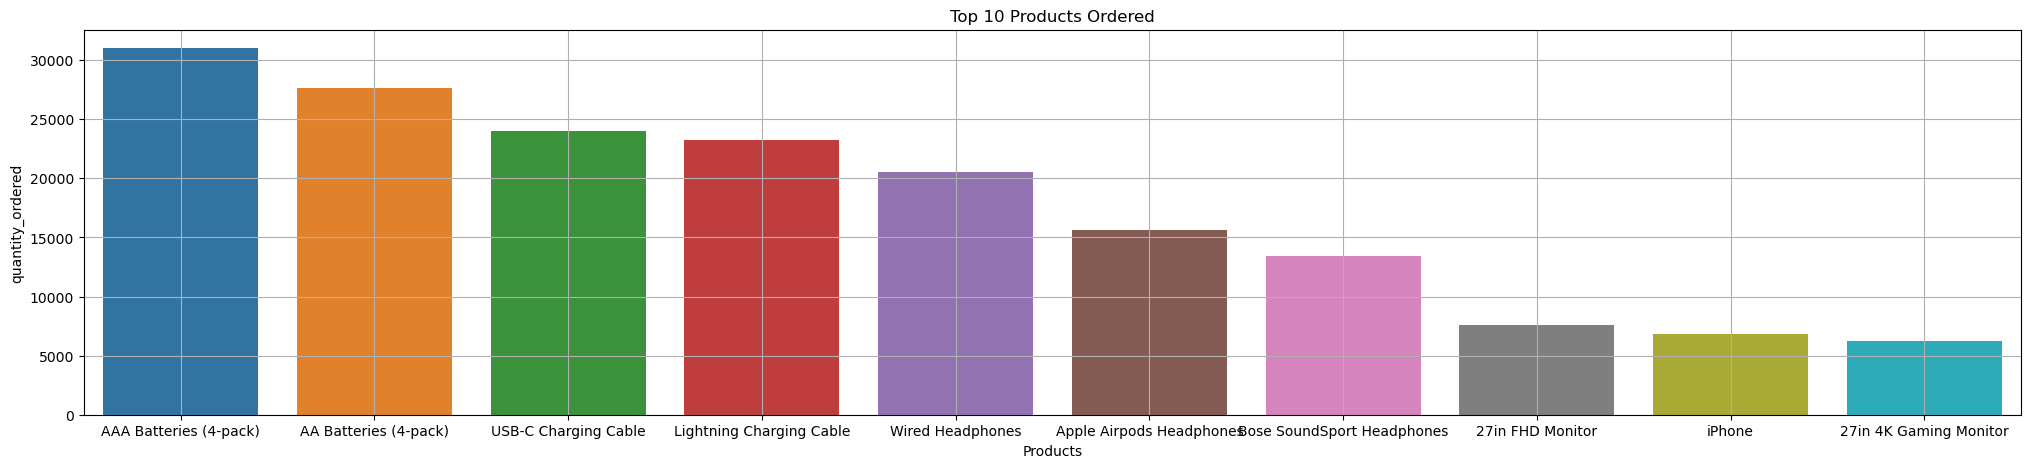

In [913]:
plt.figure(figsize=(25,5))
sns.barplot(data=top_products,x='product',y='quantity_ordered')

plt.xlabel("Products")
plt.title("Top 10 Products Ordered")
plt.grid()

plt.show()

In [914]:
product_prices = df.groupby('product')['price_each'].mean()
product_prices

product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: price_each, dtype: float64

In [919]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'month', 'sales', 'city', 'time', 'hour'],
      dtype='object')

In [937]:
product_prices 

product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: price_each, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_9764\2259793074.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_prices,rotation='vertical')


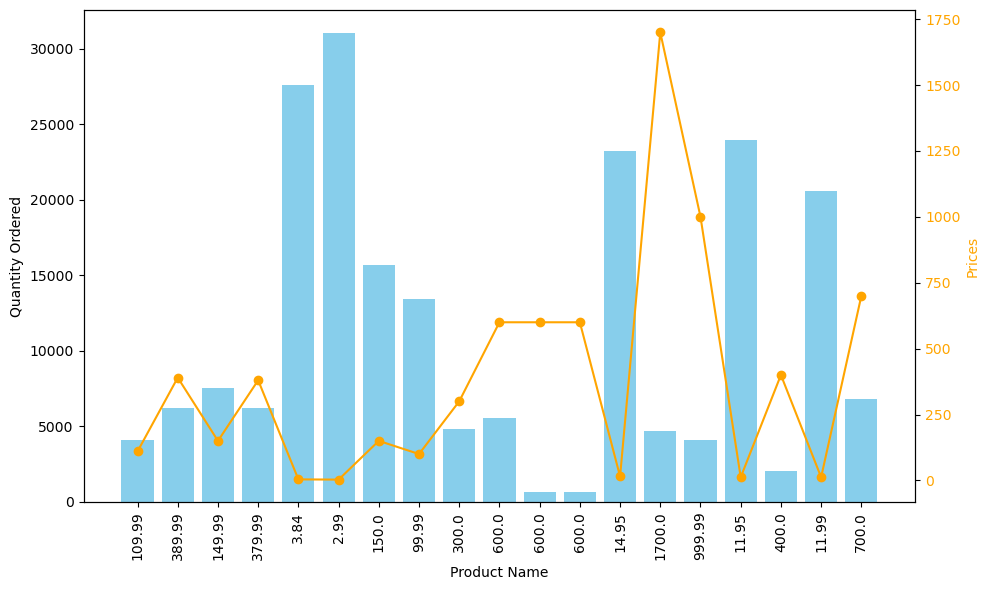

In [943]:
# Calculate average price and quantity ordered by product
product_prices = df.groupby('product')['price_each'].mean()
product_quantity = df.groupby('product')['quantity_ordered'].sum()

# Initialize the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a bar plot for quantity ordered
ax1.bar(product_prices.index, product_quantity.values, color='skyblue', label='Quantity Ordered')
ax1.set_xlabel("Product Name")
ax1.set_ylabel('Quantity Ordered', color='Black')
ax1.set_xticklabels(product_prices,rotation='vertical')
ax1.tick_params(axis='y', labelcolor='black')

# Create a secondary y-axis for the price data
ax2 = ax1.twinx()
ax2.plot(product_prices.index, product_prices.values, color='orange', marker='o', label='Price Each')
ax2.set_ylabel("Prices", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Display the plot
fig.tight_layout()
plt.show()
